# Support Vector Machines
## Exercise

## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.



## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**TASK: Your overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features. Complete the tasks below to follow along with the project.**

---
---

## Complete the Tasks in bold

**TASK: Run the cells below to import the libraries and load the dataset.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


**TASK: What are the unique variables in the target column we are trying to predict (quality)?**

In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

**TASK: Create a countplot that displays the count per category of Legit vs Fraud. Is the label/target balanced or unbalanced?**

<Axes: title={'center': 'Count per Category of Legit vs Fraud'}, xlabel='quality', ylabel='count'>

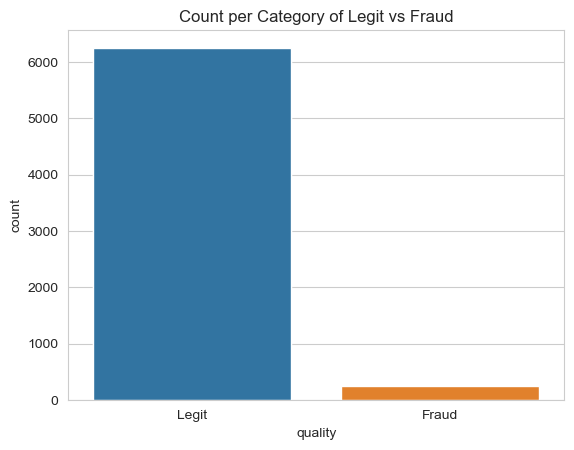

In [5]:
sns.set_style('whitegrid')
count_plot = sns.countplot(data=df, x='quality', order=['Legit', 'Fraud'])
count_plot.set_title('Count per Category of Legit vs Fraud')
sns.countplot(x='quality', data=df)

**TASK: Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.**

<Axes: xlabel='type', ylabel='count'>

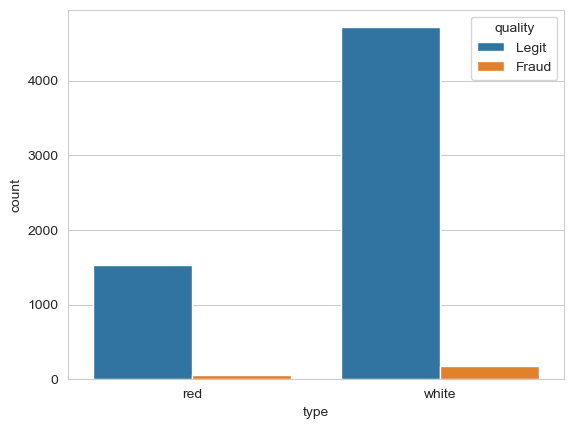

In [6]:
sns.countplot(x='type', hue='quality', data=df)

**TASK: What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [7]:
percentage_fraud_red = len(df[(df['type'] == 'red') & (df['quality'] == 'Fraud')]) / len(df[df['type'] == 'red']) * 100
print(f"Percentage of fraud in Red Wines: {percentage_fraud_red}")

Percentage of fraud in Red Wines: 3.9399624765478425


In [8]:
percentage_fraud_white = len(df[(df['type'] == 'white') & (df['quality'] == 'Fraud')]) / len(df[df['type'] == 'white']) * 100
print(f"Percentage of fraud in White Wines: {percentage_fraud_white}")

Percentage of fraud in White Wines: 3.7362188648427925


**TASK: Calculate the correlation between the various features and the "quality" column. To do this you may need to map the column to 0 and 1 instead of a string.**

In [9]:
# Map 'quality' to 0 and 1
quality_mapping = {'Legit': 0, 'Fraud': 1}
df['quality_mapped'] = df['quality'].map(quality_mapping)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Isolate the correlation values for the 'quality' column
quality_correlation = correlation_matrix['quality_mapped'].sort_values(ascending=False)
quality_correlation

/var/folders/_0/97c9g4ys4l39l2qcmv8z260m0000gn/T/ipykernel_4630/2941370495.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


quality_mapped          1.000000
volatile acidity        0.151228
chlorides               0.034499
fixed acidity           0.021794
pH                      0.020107
density                 0.016351
sulphates              -0.034046
total sulfur dioxide   -0.035252
residual sugar         -0.048756
alcohol                -0.051141
citric acid            -0.061789
free sulfur dioxide    -0.085204
Name: quality_mapped, dtype: float64

In [10]:
df['Fraud'] = df['quality'].map({'Legit': 0, 'Fraud': 1})
correlation = df.corr()['Fraud']

/var/folders/_0/97c9g4ys4l39l2qcmv8z260m0000gn/T/ipykernel_4630/1328211668.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['Fraud']


**TASK: Create a bar plot of the correlation values to Fraudlent wine.**

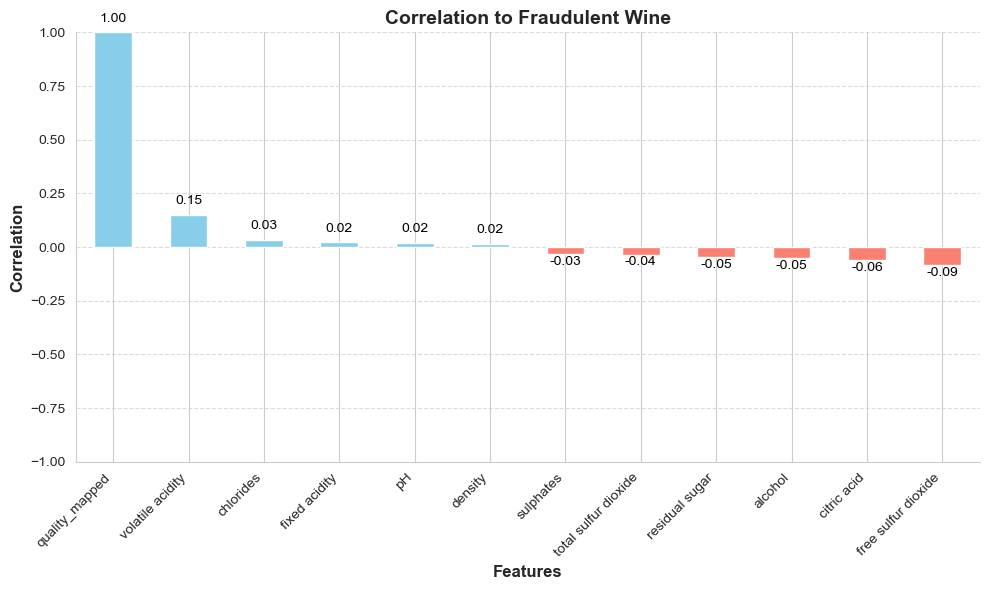

In [11]:
# Define custom colors for the bars
colors = ['skyblue' if val >= 0 else 'salmon' for val in quality_correlation]

# Create a bar plot of the correlation values to 'Fraud'
ax = quality_correlation.plot(kind='bar', color=colors, figsize=(10, 6))
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Correlation', fontsize=12, fontweight='bold')
plt.title('Correlation to Fraudulent Wine', fontsize=14, fontweight='bold')

# Set y-axis limits to include negative values
ax.set_ylim([-1, 1])

# Add annotations to the bars
for i, v in enumerate(quality_correlation):
    ax.text(i, v + 0.05 if v >= 0 else v - 0.05, f'{v:.2f}', color='black', ha='center', fontsize=10)

# Remove the legend
ax.legend().set_visible(False)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Customize x-axis labels
ax.set_xticklabels(quality_correlation.index, rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

In [12]:
df = pd.read_csv("wine_fraud.csv")

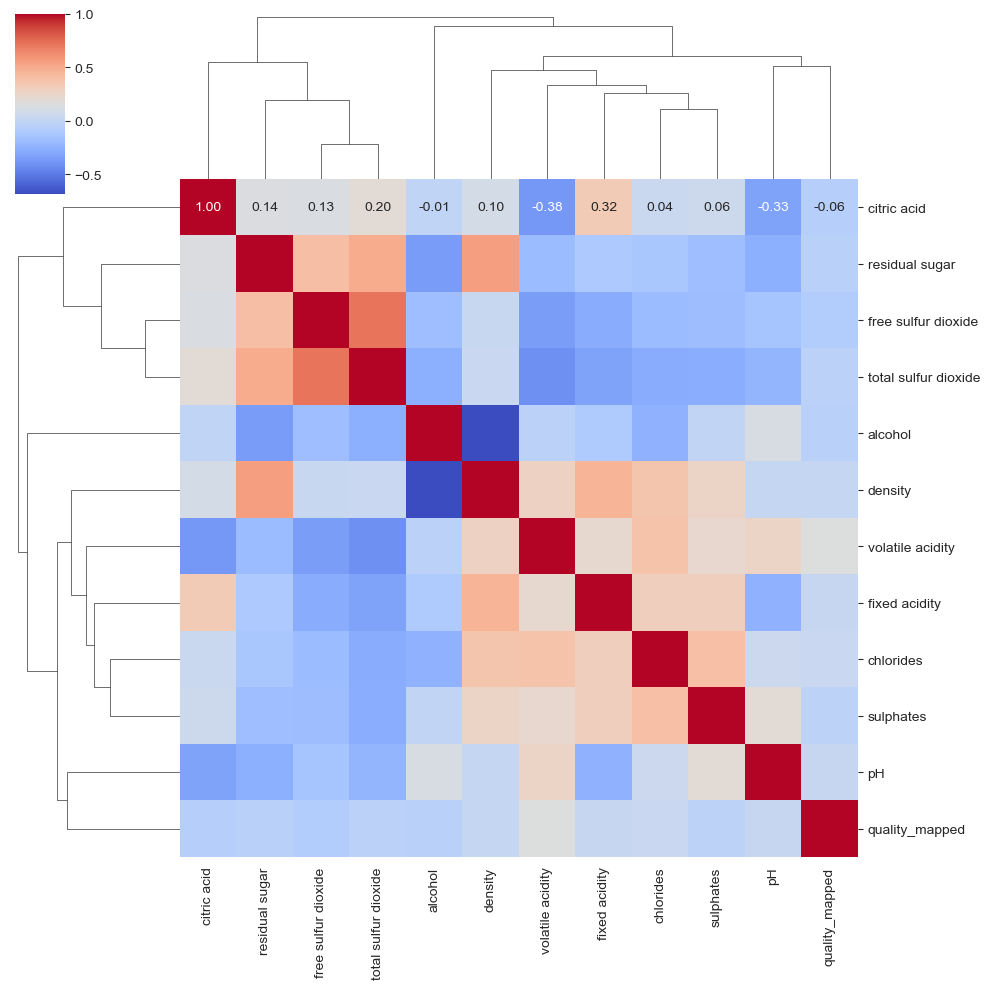

In [13]:
import seaborn as sns
sns.clustermap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', figsize=(10, 10))

plt.show()

----
## Machine Learning Model

**TASK: Convert the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [14]:
# Convert the "type" column to dummy variables
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [15]:
quality_mapping = {'Legit': 0, 'Fraud': 1}
df['quality_mapped'] = df['quality'].map(quality_mapping)

**TASK: Separate out the data into X features and y target label ("quality" column)**

In [16]:
X = df.drop(['quality', 'quality_mapped'], axis=1)
y = df['quality_mapped']

**TASK: Perform a Train|Test split on the data, with a 10% test size. Note: The solution uses a random state of 101**

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

**TASK: Scale the X train and X test data.**

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**TASK: Create an instance of a Support Vector Machine classifier. Previously we have left this model "blank", (e.g. with no parameters). However, we already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call. Check out the [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) online and look up what the argument\parameter is.**

In [19]:
from sklearn.svm import SVC

# Create an instance of the Support Vector Machine classifier with class-weight parameter
svc = SVC(class_weight='balanced')

In [20]:
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

**TASK: Display the confusion matrix and classification report for your model.**

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = y_test
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Classification Report
report = classification_report(y_true,y_pred, target_names=['Fraud', 'Legit'])
print("Classification Report:")
print(report)

Confusion Matrix:
[[531  92]
 [ 10  17]]
Classification Report:
              precision    recall  f1-score   support

       Fraud       0.98      0.85      0.91       623
       Legit       0.16      0.63      0.25        27

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



In [31]:
import pickle

# Your trained machine learning model
model = svc

# Specify the file path to save the model
model_file_path = 'wine_fraud_svm_model_pam.pkl'

# Open the file in binary write mode
with open(model_file_path, 'wb') as model_file:
    pickle.dump(model, model_file)

In [32]:
scaler_file_path = 'wine_scaler.pkl'
with open(scaler_file_path, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [27]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [28]:
import joblib
joblib.dump(svc, 'wine_fraud_svm_model_pam.pkl')

['wine_fraud_svm_model_pam.pkl']

In [29]:
import joblib
loaded_model = joblib.load('wine_fraud_svm_model_pam.pkl')